# Pycaret Regression - AI Final Project - Jordan Lee
Parkinson’s disease is a disorder which affects an individual’s nervous system, often hindering basic human function: slowed movement, tremors, speech changes, muscle stiffness, and loss of automatic movements. While it cannot be cured, medical treatments can significantly improve these symptoms. This project uses PyCaret to apply several machine learning algorithms to the Parkinsons Telemonitoring dataset obtained from Oxford, to predict how much an individual is affected by Parkinson’s disease. Results show that the Extra Trees Regressor model performs the best, containing the lowest MSE, RMSE, R2, and RSMLE values.

In [32]:
import pycaret
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)

# Retrieve data and exclude motor_UPDRS target column, and subject#
X = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets
y = y['total_UPDRS']

data = pd.concat([X,y], axis=1)
data

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,total_UPDRS
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0,34.398
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0,34.894
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0,35.389
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0,35.810
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,0,33.485
5871,61,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,0,32.988
5872,61,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,0,32.495
5873,61,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,0,32.007


# Setup
Initialize training environment & prepares data for modelling. Requires parameters for data and target. **Setup() automatically preprocesses data, performing actions such as handling missing values and one-hot encoding categorical variables.**

In [ ]:
from pycaret.regression import *

s = setup(data, target='total_UPDRS', session_id=123)
s

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


# Compare Models
Train & evaluate performance of all available estimators in the model library using 10-fold cross-validation (by default). Outputs a grid with average cross-validated scores.

The best performing model is selected (extra trees regressor)

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0251,3.1969,1.7814,0.9716,0.0964,0.0514,1.2710
rf,Random Forest Regressor,0.9971,3.9941,1.9837,0.9647,0.0970,0.0487,4.9270
xgboost,Extreme Gradient Boosting,1.4146,4.8322,2.1936,0.9571,0.1056,0.0643,0.5380
catboost,CatBoost Regressor,1.5544,4.8993,2.2106,0.9566,0.1089,0.0721,7.7920
lightgbm,Light Gradient Boosting Machine,1.4472,5.0671,2.2378,0.9551,0.1054,0.0660,2.1580
dt,Decision Tree Regressor,1.0412,11.5561,3.3632,0.8980,0.1444,0.0473,0.0930
gbr,Gradient Boosting Regressor,3.9043,25.0843,5.0033,0.7780,0.1999,0.1668,2.4990
knn,K Neighbors Regressor,6.1178,65.4495,8.0813,0.4211,0.3002,0.2556,0.0380
ada,AdaBoost Regressor,7.2677,69.7319,8.3470,0.3819,0.3225,0.3181,1.4550
lr,Linear Regression,8.0521,94.6137,9.7232,0.1619,0.3638,0.3517,0.7880


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

# Analyze Model
Analyze performance of trained models on the test set

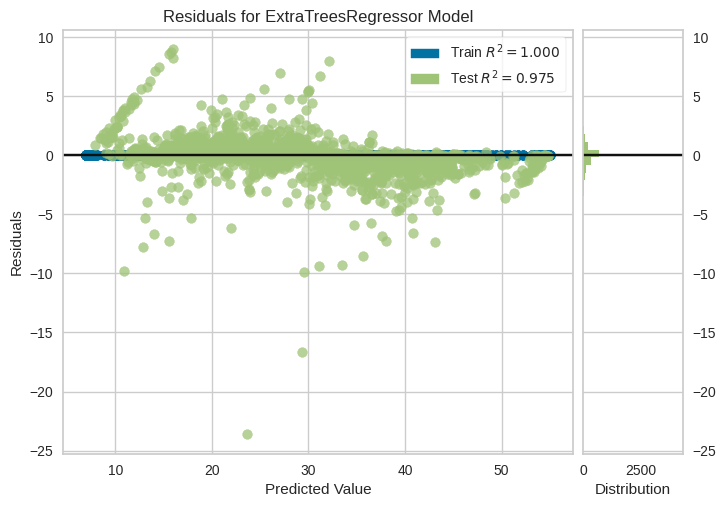

In [ ]:
# Plotting residuals
plot_model(best, plot='residuals')

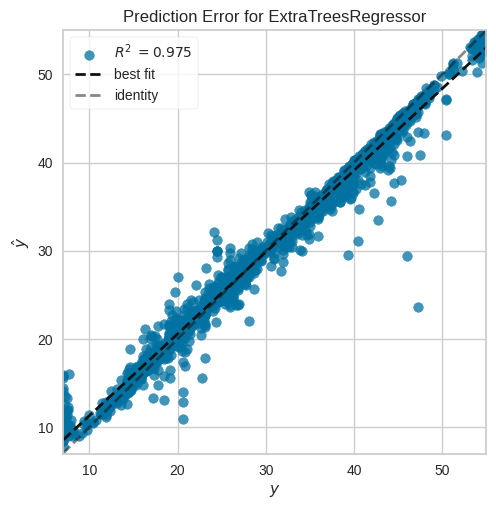

In [ ]:
# Plot model error
plot_model(best, plot='error')

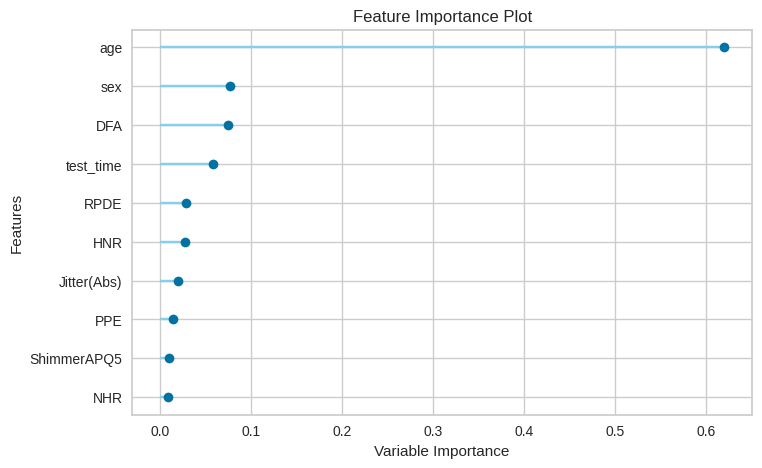

In [ ]:
# Plot feature importance. Age is the most important feature
plot_model(best, plot='feature')

# Prediction
Predict_model returns prediction_label as a new column for the input dataframe. If the data is None, it uses the test set for scoring (created during the setup function)

Predict_model takes a trained model as a parameter, which is the best model obtained from compare_models()


In [33]:
# Predict on test set
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.9317,2.9012,1.7033,0.9752,0.0843,0.0435


In [ ]:
# Display prediction dataframe. Prediction_label is now added
pred.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,...,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,total_UPDRS,prediction_label
2661,55,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,0.00886,...,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,0,26.663000,23.84087
1172,73,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,0.00555,...,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,1,29.031000,29.11916
1877,58,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,0.01122,...,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,1,25.417999,24.91427
547,74,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,0.01970,...,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,0,27.139000,27.60111
5068,56,105.790001,0.00545,0.000028,0.00320,0.00296,0.00961,0.02196,0.192,0.01252,...,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,1,43.201000,42.96512


Predicting labels on an unseen dataset

In [ ]:
# Copy data & drop the target column total_UPDRS
newData = data.copy()
newData.drop('total_UPDRS', axis=1, inplace=True)
newData.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0


In [ ]:
# Predict the model on the new dataset
prediction = predict_model(best, data=newData)
prediction.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,prediction_label
0,72,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,0,34.397999
1,72,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,0,34.894001
2,72,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,0,35.389000
3,72,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,0,35.810001
4,72,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,0,36.375000


# Saving the model
Save the model for later use

In [ ]:
# Save pipeline
save_model(best, 'AI_Final_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'test_time', 'Jitter(%)',
                                              'Jitter(Abs)', 'Jitter:RAP',
                                              'Jitter:PPQ5', 'Jitter:DDP',
                                              'Shimmer', 'Shimmer(dB)',
                                              'Shimmer:APQ3', 'Shimmer:APQ5',
                                              'Shimmer:APQ11', 'Shimmer:DDA',
                                              'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
                                              'sex'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(t

In [ ]:
# Load the pipeline
bestPipeline = load_model("AI_Final_Model")
bestPipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'test_time', 'Jitter(%)',
                                             'Jitter(Abs)', 'Jitter:RAP',
                                             'Jitter:PPQ5', 'Jitter:DDP',
                                             'Shimmer', 'Shimmer(dB)',
                                             'Shimmer:APQ3', 'Shimmer:APQ5',
                                             'Shimmer:APQ11', 'Shimmer:DDA',
                                             'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
                                             'sex'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])